## Notebook per l'esercitazione legata alla lezione 13.

Calcolo delle traiettorie P/T adiabatiche per la reazione ens+cor <--> py

Il programma è lo stesso *gibbs_tp* già usato nelle esercitazioni precedenti, a cui è stata aggiunta una funzione (*adiabat*) che fa i calcoli rilevanti in questo caso. La nuova funzione è riportata nella cella sottostante per chi volesse studiarla. La strategia che segue nel fare i calcoli è descritta nelle ultime slide delle lezioni *termodinamica_13*.

```
def adiabat(tini,tfin,nt,pini,pfin,npp,env=0.,nsamp=0, grd=False):
    """
    Computes adiabats on a P/T grid for the ens+cor <--> py reaction
    
    Input:
        tini, tfin, nt: minimum, maximum and number of point 
                        along the temperature axis
        pini, pfin, npp: minimum, maximum and number of point
                         along the pressure axis
        env: if env > 0., value of the entropy correspondent to wanted
             P/T path (default = 0.)  
        nsamp: if > 0, restricts the number of entries of the printed
               P/T/V list to nsamp values (default = 0.). Relevant if
               env > 0.
        grd: if True, plots the grid of sampling P/T points 
             (default = False)
    """
    t_list=np.linspace(tini,tfin,nt)
    p_list=np.linspace(pini,pfin,npp)
    tg, pg=np.meshgrid(t_list,p_list)
    
    ntp=nt*npp
    
    tgl=tg.reshape(ntp)
    pgl=pg.reshape(ntp)
    
    ent=np.array([])
    index=0
    for it in tgl:
        ip=pgl[index]
        g_py=py.g_tp(it,ip)      # specify here the phases involved
        g_ens=ens.g_tp(it,ip)
        g_cor=cor.g_tp(it,ip)
        g_rea=1.5*g_ens+g_cor
        if g_py < g_rea:
           ient=py.s_tp(it,ip)
        else:
           ient=1.5*ens.s_tp(it,ip)+cor.s_tp(it,ip)
        ent=np.append(ent,ient)
        index=index+1  
    
    ent=ent.reshape(npp,nt)
    
    if grd:
       plt.figure()
       plt.scatter(tg,pg,s=20,color='k')
       plt.xlabel("T (K)")
       plt.ylabel("P GPa")
       plt.title("Grid")
       plt.show()
    
    plt.figure()
    if env > 0.:
       con=plt.contour(tg,pg,ent, [env])
       p1=con.collections[0].get_paths()[0]
       path=p1.vertices
    else:
       con=plt.contour(tg,pg,ent)
    
    if env > 0.:
        plt.close()
    else:
        plt.clabel(con, inline=1, fontsize=10)
        plt.xlabel("T (K)")
        plt.ylabel("P (GPa)")
        plt.title("Entropy (J/K mol)")
        plt.show()
    
    if env > 0.:
        t_val=path[:,0]
        p_val=path[:,1]
        plt.figure()
        plt.plot(p_val,t_val)
        plt.ylabel("T (K)")
        plt.xlabel("P (GPa)")
        title="P/T adiabat for an entropy of " + str(env) \
             + " J/(K mol)"
        plt.title(title)
        plt.show()
        
        ipos=p_val.argsort()
        t_val=t_val[ipos]
        p_val=p_val[ipos]
        
        ism=1
        if nsamp > 0:
           lt=len(t_val)
           if lt > nsamp:
              ism=int(lt/nsamp)
              
        index=0
        t_val=t_val[0:-1:ism]
        p_val=p_val[0:-1:ism]
        v_val=np.array([])
        for it in t_val:
            ip=p_val[index]
            dg=py.g_tp(it,ip)-(1.5*ens.g_tp(it,ip)+cor.g_tp(it,ip))
            if dg < 0.:
                iv=py.volume_p(it,ip)
            else:
                iv=1.5*ens.volume_p(it,ip)+cor.volume_p(it,ip)
            v_val=np.append(v_val,iv)
            index=index+1
            
        serie=(p_val.round(2),t_val.round(1),v_val.round(3))
        pd.set_option('colheader_justify', 'center')
        df=pd.DataFrame(serie, index=['P (GPa)','T (K)','Vol (J/bar)'])
        df=df.T
        print("")
        print(df.to_string(index=False))
```

### Lanciamo il programma

In [6]:
%matplotlib inline
%run gibbs_tp_adiabat

Per una descrizione dell'input accettato da *adiabat*, si usi il comando *help*

In [8]:
help(adiabat)

Help on function adiabat in module __main__:

adiabat(tini, tfin, nt, pini, pfin, npp, env=0.0, nsamp=0, grd=False)
    Computes adiabats on a P/T grid for the ens+cor <--> py reaction
    
    Input:
        tini, tfin, nt: minimum, maximum and number of point 
                        along the temperature axis
        pini, pfin, npp: minimum, maximum and number of point
                         along the pressure axis
        env: if env > 0., value of the entropy correspondent to wanted
             P/T path (default = 0.)  
        nsamp: if > 0, restricts the number of entries of the printed
               P/T/V list to nsamp values (default = 0.). Relevant if
               env > 0.
        grd: if True, plots the grid of sampling P/T points 
             (default = False)



I calcoli illustrati nelle slide sono stati effettuati usando la funzione adiabat come illustrato nelle due celle successive.

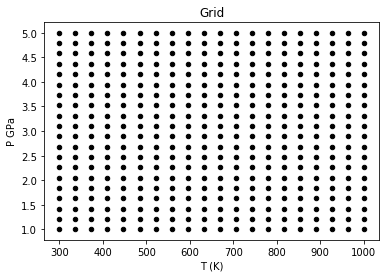

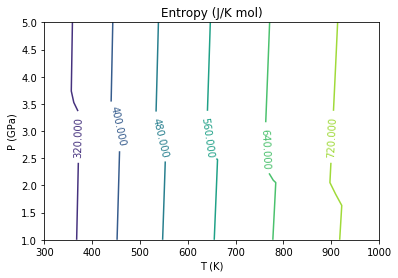

In [3]:
adiabat(300,1000,20,1,5,20,grd=True)

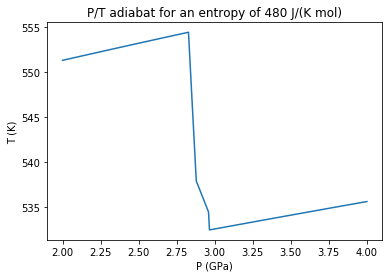


 P (GPa)  T (K)  Vol (J/bar)
  2.00    551.3    11.830   
  2.14    551.9    11.817   
  2.34    552.7    11.798   
  2.55    553.4    11.780   
  2.76    554.2    11.761   
  2.85    548.3    11.751   
  2.88    537.9    11.745   
  2.97    532.5    11.184   
  3.17    533.1    11.171   
  3.38    533.8    11.158   
  3.59    534.4    11.146   
  3.72    534.8    11.137   
  3.93    535.4    11.125   


In [9]:
adiabat(500,600,30,2,4,30,env=480,nsamp=10)